In [1]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
!pip install modal


In [5]:

!modal token new

Was not able to launch web browser
Please go to this URL manually and complete the flow:

]8;id=979588;https://modal.com/token-flow/tf-SVWPEr8i3aShnZwv00xh4q\https://modal.com/token-flow/tf-SVWPEr8i3aShnZwv00xh4q]8;;\

⠋ Waiting for authentication in the web browser
⠏ Waiting for token flow to complete...https://modal.com/authorize?token=abc123...
⠦ Waiting for token flow to complete... (attempt 8)
Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7c45026dc9a0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):

KeyboardInterrupt: 


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vijaays","key":"1d975bc60663ce63edbc7d5b2115665c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0
  0% 0.00/103M [00:00<?, ?B/s]
100% 103M/103M [00:00<00:00, 1.36GB/s]


In [4]:
!unzip /content/car-vs-bike-classification-dataset.zip
!ls /content

Archive:  /content/car-vs-bike-classification-dataset.zip
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1004).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1005).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1006).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1007).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1008).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1009)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

dataset_dir = '/content/Car-Bike-Dataset'
classes = os.listdir(dataset_dir)


output_dir = 'output_dataset'
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]

    print(cls, len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)


    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))

    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))

    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("✅ Dataset split into training, validation, and test sets.")

Car 200
Bike 200
✅ Dataset split into training, validation, and test sets.


In [6]:
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 240 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
{'Bike': 0, 'Car': 1}
{'Bike': 0, 'Car': 1}
{'Bike': 0, 'Car': 1}


In [18]:
trainpath = "/content/output_dataset/train"
testpath = "/content/output_dataset/test"

train = train_datagen.flow_from_directory(trainpath, target_size=(224, 224), batch_size=20)
test = test_datagen.flow_from_directory(testpath, target_size=(224, 224), batch_size=20)

Found 240 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

vgg = VGG16(include_top=False,weights="imagenet", input_shape=(224, 224, 3))

for layer in vgg.layers:
    print(layer)

print(len(vgg.layers))

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

vgg16 = Model(inputs=vgg.input, outputs=output)

vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>
19


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
from PIL import Image, UnidentifiedImageError
import os

def remove_corrupt_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                path = os.path.join(root, file)
                try:
                    with Image.open(path) as img:
                        img.verify()
                except (UnidentifiedImageError, IOError, SyntaxError):
                    print(f"Removed corrupt image: {path}")
                    os.remove(path)

remove_corrupt_images('/content/output_dataset/train')
remove_corrupt_images('/content/output_dataset/val')
remove_corrupt_images('/content/output_dataset/test')

In [11]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model
vgg16.compile(optimizer= opt, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stopping]
)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 733ms/step - accuracy: 0.8939 - loss: 0.2878 - val_accuracy: 0.9500 - val_loss: 0.1296
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.9351 - loss: 0.1578 - val_accuracy: 0.9250 - val_loss: 0.1718
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.9494 - loss: 0.1815 - val_accuracy: 0.9500 - val_loss: 0.1114
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - accuracy: 0.9489 - loss: 0.1041 - val_accuracy: 0.9625 - val_loss: 0.1171
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 482ms/step - accuracy: 0.9653 - loss: 0.1071 - val_accuracy: 0.9500 - val_loss: 0.1119
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.9775 - loss: 0.0782 - val_accuracy: 0.9625 - val_loss: 0.1180
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.9868 - loss: 0.0569 - val_accuracy: 0.9625 - val_loss: 0.1215


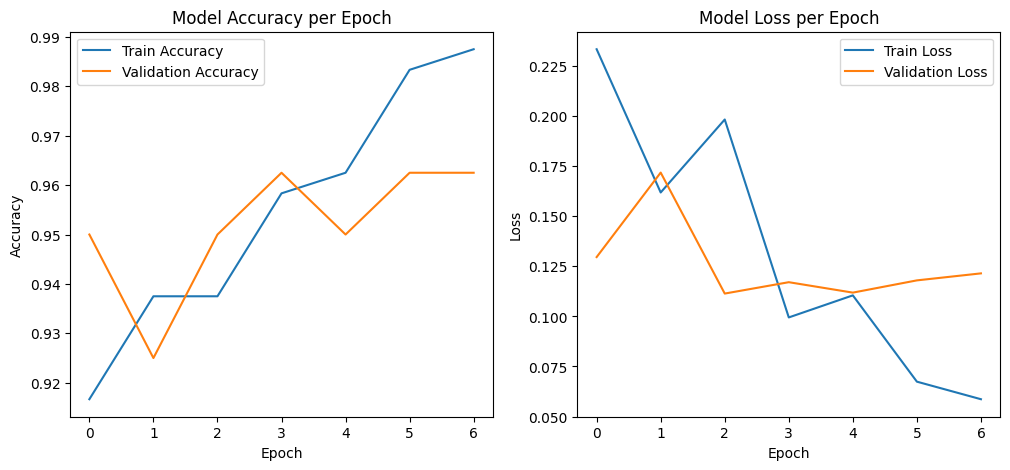

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]

final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print("\nFinal Training Metrics:")
print(f"Final Accuracy = {final_train_acc:.4f}")
print(f"Final Loss = {final_train_loss:.4f}")

print("\nFinal Validation Metrics:")
print(f"Final Accuracy = {final_val_acc:.4f}")
print(f"Final Loss = {final_val_loss:.4f}")

test_loss, test_accuracy = vgg16.evaluate(test_generator)
print(f"Accuracy on the test set: {test_accuracy:.4f}")


Final Training Metrics:
Final Accuracy = 0.9875
Final Loss = 0.0587

Final Validation Metrics:
Final Accuracy = 0.9625
Final Loss = 0.1215
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9836 - loss: 0.0746
Accuracy on the test set: 0.9750


In [17]:
vgg16.save('car_vs_bike.h5')
print("Model Saved Successfully........")

Model Saved Successfully........


In [19]:
from google.colab import files
files.download('car_vs_bike.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>